![portada](https://github.com/Adalab/data_imagenes/blob/main/Modulo-2/Repaso_Viz_Esta/Portada.png?raw=true)

En esta lección haremos un repaso de los principales conceptos aprendidos en las lecciones de Estadística y Visualización, lo haremos mediante un estudio práctico de un set de datos que podréis encontrar en el gitbook. 

Antes de empezar os dejamos por aquí una tabla resumen sobre las principales gráficas y cuando podemos usarlas: 

| Gráfica  | Uso  | 
|---|---|
| **Barras**  | Descriptivo datos   |  
|**Catplot**| Es una alternativa a las barras. Muy útil para representar variables categóricas|
|**Swarmplot**|La usaremos para representar variables cualitativas. Similar al gráfico de barras, solo que evita la superposición de puntos|
| **Pie Chart** (Quesitos) | Determinación de frecuencias  |   
|  **Líneas** | Tendencias de variables   |   
|**Histograma**| Determinación de la distribución|
|**Boxplot**| Representación de las medidas de posición mas usadas. Lo usaremos mucho para detectar *outliers* visualmente|
|**Scatterplot**| Identificar relación entre variables numéricas|
|**Violinplot**| Visualizar la distribución de los datos y su densidad de probabilidad|
|**Countplot**|Describir variables cualitativas, contando el numero de observaciones por cada categória. Es el gráfico más usado|
|**Pairplot**| Para representar múltiples relaciones entre dos variables|
|**Heatmap**|Evaluar la correlación entre las variables cuando hacemos la matriz de correlación|



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../files/housing_melbourne.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Descripción del dataset

In [3]:
# recordemos el método de pandas ".info", nos da la detalles del tipo de datos de cada variable de nuestro conjunto de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


El resultado nos muestra un total de 63023 filas. En general, las columnas son de tipo "int64" y "float64", es decir, columnas de numérico, mientras que el tipo de datos "object" indica que son datos de tipo *string*.

Lo primero que hacemos es ver que tenemos valores nulos en la columna de `Price`, para este ejercicio, vamos a eliminar estos valores nulos, pero ojo! Esto es algo meramente docente, NO es una buena práctica. 

In [4]:
df.dropna(inplace = True)

In [5]:
# también podemos ver si tenemos filas duplicadas usando el método ".duplicated()"

df.duplicated().sum()

1

En este caso, tenemos un duplicado, por lo tanto vamos a eliminarlos 👇🏽

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
# volvemos a chequear que ya no tenemos duplicados 
df.duplicated().sum()

0

# Estadística descriptiva del dataset

## Media, Mediana , Moda, mínimo y máximo

Una forma habitual de resumir nuestros datos numéricos es averiguar la tendencia central de nuestros datos. En este caso nos podemos preguntar: 

- ¿Cuál es el valor más típico del precio de la vivienda en nuestro conjunto de datos?
- ¿Cuál es la casa más barata? ¿Y la más cara? 
- ¿Cuál es el precio medio de las casa en Melbourne? 

Para responder a esta pregunta, podemos recurrir a las dos medidas de centro más comunes: la **media**, la **mediana** o la **moda**.

In [8]:
# Para responder a la primera pregunta deberíamos usar la moda. Este estadístico, nos va a devolver el precio que más veces se repite en nuestro set de datos. 
moda = df["Price"].mode()
print(f"La moda (el precio que más se repite en nuestro set de datos) es {round(moda[0], 2)}")

La moda (el precio que más se repite en nuestro set de datos) es 600000.0


In [9]:
# Para saber las casas más baratas y más caras podemos usar el min y el max

casas_baratas = df["Price"].min()
casas_caras = df["Price"].max()


print(f"El precio mínimo de las casas de nuestro set de datos es {casas_baratas} y el de las caras es {casas_caras}")

El precio mínimo de las casas de nuestro set de datos es 85000.0 y el de las caras es 11200000.0


In [10]:
# MEDIA: es un promedio de todos los precios de las casas

media = df["Price"].mean()
print(f"El precio medio de las casas en Melbourne es: {round(media, 2)}")

El precio medio de las casas en Melbourne es: 997897.99


In [11]:
# MEDIANA: es el valor de la posición central de una lista ordenada de números, en este caso, la columna sobre la que queremos calcular la mediana

mediana = df["Price"].median()
print(f"La mediana de los precios de las casas de Melbourne es {round(mediana, 2)}")

La mediana de los precios de las casas de Melbourne es 830000.0


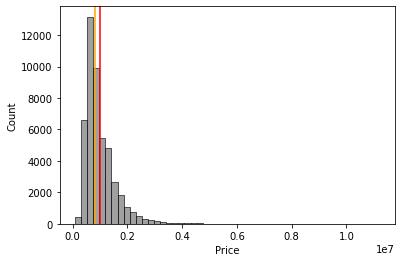

In [12]:
# sigamos recordando un poco gráficas. En este caso. queremos ver como están distribuidos los precios- 
# Para esto podemos usar un histplot o un barplot

sns.histplot(data = df, x = "Price", bins = 50, color = "grey")
plt.axvline(media, color='red')
plt.axvline(mediana, color='orange');



En ocasiones nos podremos preguntar que metrica deberemos usar, ya que a veces estos valores pueden ser muy diferentes, como ocurre en nuestro ejemplo. 

Esto se debe a que una media puede estar influenciada por los valores atípicos u *outliers*. Esto puede ser el resultado de que nuestro datos presenten mucha dispersión debido entre otros motivos a  la presencia de *outliers*, lo que podría implicar que nuestros datos tienen una gran dispersión. 

En este punto, entonces, nos podemos preguntar como podemos saber si nuestros datos están muy dispersos y como podemos detectar los *outliers*: 

Recordemos que: 

- Para evaluar como de dispersos están los datos podemos usar las métricas de varianza y desviación típica

- Para detectar estos *outliers*  los podemos evaluar o identificar usando los percentiles y rangos intercuartílicos. 

En este contexto, y viendo la gráfica anterior, podríamos pensar que nuestros datos están sesgados. Recordemos que este estadístico, nos da información de la forma que tiene nuestro histograma y que lo teníamos que calcular con la librería `scipy`. Los valores que puede tomar este estadístico son positivos, negativos y 0. De esta forma: 

- Positivo: La "cola" derecha del histograma será más larga que la izquierda. A este tipo de distribución de los valores se le llama "sesgado a la derecha" (right-skewed, right-tailed).

- Negativo: La "cola" izquierda del histograma será más larga que la derecha. A este tipo de distribución de los valores se le llama "sesgado a la izquierda" (left-skewed, left-tailed).

- Cero: un skewness igual a 0 nos indica que la distribución de los valores es simétrica respecto a la media.

In [13]:
from scipy.stats import skew

skewness = skew(df['Price'])
print(skewness)

2.650014651939154


Como vemos en el gráfico anterior, vemos que tenemos una cola en la derecha muy larga, por lo que tenemos un `skewness` positivo. 

In [14]:
import scipy.stats as st

# Queremos realizar el calculo de confianza para la media de la longitud de los sépalos
data = df['Price']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de longitud de los sépalos con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(992612.113351575, 1003183.8698826503)
997897.9916171127


## Desviación respecto a la media, Varianza,  Desviación Típica:

La varianza es un cálculo que nos dice como de alejados están los datos con respecto a su media. Para calcularla restabamos a cada precio la media y lo elevabamos al cuadrado. 

In [15]:
varianza = df["Price"].var()
print(f"La varianza de los precios es {varianza}")

La varianza de los precios es 352248236921.98206


Nuestra varianza es 352248236921.98206 dólares al cuadrado (sí, suena raro, pero es al cuadrado). 

¿Por qué elevamos las diferencias al cuadrado para tener unidades al cuadrado?

Porque si no lo hiciéramos, el resultado sería 0 y ese valor no nos sirve para nada, pues sería como decir que todos los datos son iguales o que no se alejan del precio medio de las casas (997897.99), lo cual es falso. Así es la estadística. Veamos esto paso a paso para ver como si no elevamos al cuadrado nos da 0. 

In [16]:
# nos creamos una columna nueva donde restamos al precio de cada casa el valor de la media. Esta columna nos dirá lo que se desvía cada casa del precio de la media, lo que  es lo mismo que la 
# desviación respecto a la media

df["diferencia"] = df["Price"] - df["Price"].mean()

In [17]:
# si ahora sumamos todos esos valores, nos dará cero! Como vemos al ejecutar esta celda. 

df["diferencia"].sum()

1.5944242477416992e-06

Mientras tanto, la desviación estándar (o típica) simplemente es la raíz cuadrada de la varianza. Podríamos hacerlo manualmente, pero en pandas tenemos un método que nos lo va a hacer automáticamente, el método `std()` 

In [18]:
desviacion_estandar = df["Price"].std()
print(f"La desviación estándar de nuestro datos es {round(desviacion_estandar, 2)}")

La desviación estándar de nuestro datos es 593505.04


¿Entonces cual es la diferencia entre una y otra? 

- Sirven para casi lo mismo, pero la desviación típica es útil para tener el dato en dólares.

¿Y entonces qué cosas puedo encontrar con la varianza, si la desviación típica ya me indica algo más concreto en sí?

- Pues para encontrar medidas como la misma desviación típica, la covarianza, la correlación lineal y modelos como la recta de regresión y los de efectos fijos o aleatorios, los cuales forman parte de un panomara más amplio de la estadística, que en este punto no es necesario que entendamos al 100% ya que lo veremos en el módulo 3. 

## Percentiles y Rangos intercuartilicos

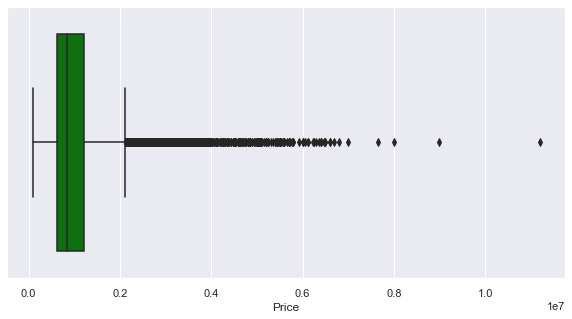

In [19]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

# Creando el grafico de cajas
sns.boxplot(data = df, x =  "Price", color=  "green");


EXPLICACION

Nos podemos preguntar cuales son los motivos por lo que podemos encontrar *outliers* en nuestros datos, los principales motivos son: 

| Causa |  Posibles soluciones |   
|---|---|
|  Error al meter los datos | Corregir el error y volver a analizar los datos.  |   
|  Problema al procesar los datos |  Investigar el proceso para determinar la causa del valor atípico. |   
|  Por pura probabilidad |  Investigar el proceso y el valor atípico para determinar si este se produjo en virtud de las probabilidades; la recomendacion es realizar el análisis con y sin el valor atípico para ver su impacto en los resultados.  |





Hasta aquí bien, ya hemos podido entender porque hay tanta diferencia entre la media y la mediana. Pero nos quedaría identificar a que valores corresponde cada uno de los puntos que son *outliers*. Es decir, que casas son las que son *outliers*. Para eso recordemos que podemos usar los cuartiles y los rangos intercuartilicos. 

Estos rangos intercuartilicos nos van a calcular la diferencia entre el primer cuartil y el tercer quartil. Esto lo podemos calcular usando la librería NumPy

In [20]:
# calculamos los cuartiles

q3, q1 = np.percentile(df["Price"], [75, 25])

print(f"El primer cuartil es {q1} y el tercer cuartil es {q3}")

El primer cuartil es 620000.0 y el tercer cuartil es 1220000.0


Es decir, el 50% de nuestras casas tienen precios entre 1220000.0 y 620000.0

Pero... ¿Qué significan estos valores en concreto?

- `q1`: en nuestro caso el valor es de 620000.0, es decir, el 25% de los precios de las casas es menor que 620000.0. 

- `q3`: este valor es de 1220000.0, es decir, el 75% de los precios de las casas es menor que  1220000.0. Lo que es lo mismo que el 25% de los pisos vale más de  1220000.0. 


Una vez que hemos identificado los cuartiles, lo siguiente que tenemos que hacer es calcular el rango intercuartilico. 

In [21]:
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 600000.0


## Coeficiente de variación

Otros de los conceptos que aprendimos en las lecciones es el de coeficiente de variación, el cual está muy relacionado con la media y la desviación estándar. Pero... ¿cuándo nos puede resultar útil calcular este estadístico? 

El coeficiente de variación nos permite comparar las dispersiones de dos distribuciones distintas, siempre que sus medias sean positivas. ¿Qué significa esto?
En nuestro dataset tenemos una columna donde nos dan información de la región donde se encuentra la casa. Estas regiones son: 

```python
['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria']
```

De todas estas regiones, nosotras estamos especialmente interesadas en comprar una casa en la región de Victoria. En este caso, nos podemos preguntar en cual de las regiones de Virginia hay más variación en los precios, por lo tanto, deberemos hacer una comparación entre cada región. Para esto, tendremos que calcular el coeficiente de variación. 

In [22]:
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,diferencia
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,492102.008383
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,222102.008383


Lo primero que tenemos que hacer es crear un subdataframe para cada una de las regiones de Virginia. 

In [23]:
df_virginia_norte = df[df["Regionname"] == 'Northern Victoria']
df_virginia_norte.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,diferencia
193,Diamond Creek,27 Fairview Cr,4,h,730000.0,SP,Mason,1/04/2017,3089,Northern Victoria,4258,21.8,Nillumbik Shire Council,-267897.991617
528,Riddells Creek,22 Melvins Rd,3,h,410000.0,S,Raine,1/04/2017,3431,Northern Victoria,1475,47.4,Macedon Ranges Shire Council,-587897.991617


In [24]:
df_virginia_este = df[df["Regionname"] == 'Eastern Victoria']
df_virginia_este.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,diferencia
265,Frankston North,5 Silvertop St,3,h,450000.0,S,Aquire,1/04/2017,3200,Eastern Victoria,2500,36.9,Frankston City Council,-547897.991617
422,Mooroolbark,5 Chaucer St,3,h,778000.0,S,Hoskins,1/04/2017,3138,Eastern Victoria,8280,26.5,Yarra Ranges Shire Council,-219897.991617


In [25]:
df_virginia_oeste = df[df["Regionname"] == 'Western Victoria']
df_virginia_oeste.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,diferencia
399,Melton,19 Joan St,3,h,431000.0,S,Raine,1/04/2017,3337,Western Victoria,3600,31.7,Melton City Council,-566897.991617
936,Melton,38 Gretel Gr,4,h,320000.0,SP,Raine,1/07/2017,3337,Western Victoria,3600,31.7,Melton City Council,-677897.991617


Lo siguiente sería calcular la media y la desviación estándar para cada uno de los datasets que acabamos de crear. 

In [26]:
# calculamos las medias

media_vir_nor = df_virginia_norte["Price"].mean()
media_vir_est = df_virginia_este["Price"].mean()
media_vir_oest = df_virginia_oeste["Price"].mean()

In [27]:
# calculamos las desviaciones

desviacion_vir_nor = df_virginia_norte["Price"].std()
desviacion_vir_est = df_virginia_este["Price"].std()
desviacion_vir_oest = df_virginia_oeste["Price"].std()

In [28]:
# ahora calculamos los coeficientes

coef_norte = desviacion_vir_nor / media_vir_nor
coef_este = desviacion_vir_est / media_vir_est
coef_oeste = desviacion_vir_oest / media_vir_oest


print(f"Los coeficientes de variación son: \n Virginia Norte: {coef_norte}, \n Virginia Este: {coef_este}, \n Virginia Oeste: {coef_oeste}")

Los coeficientes de variación son: 
 Virginia Norte: 0.41888987594998733, 
 Virginia Este: 0.3193278174420007, 
 Virginia Oeste: 0.29770738284940157


Como vemos la región con menor coeficiente de correlación es la región de Virginia Oeste, esto quiere decir, que es la región donde menos varían los precios con respecto a la media. Es decir, los precios varían en torno a un 29% de la media. 

## Correlación y Tabla de contingencia

Recordemos que la diferencia entre estos dos conceptos es el tipo de variable sobre el que se aplican:

- Coeficiente de correlación: se aplica sobre variables continuas cuantitativas

- Tablas de contigencia: se aplica sobre variables cualitativas

Imaginemos ahora que estamos interesadas en comprar una casa cerca de la playa. Pero queremos saber si existe una relación entre el precio y la distancia a la playa. Como son dos variables de tipo continua, tendremos que usar la correlación de Person. Este estadístico variará entre 1 y -1: 


- Si el coeficiente es mayor que 0, la correlación es positiva (“A más, más, y a menos menos"). 

- Si el coeficiente es menor que 0, la correlación es negativa (“A más, menos, y a menos, más"). 

- Si el coeficiente de correlación es de 0 es que no hay ninguna correlación entre las dos variables. 


In [29]:
# recordemos el dataframe
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,diferencia
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,492102.008383
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,222102.008383


In [30]:
# recordemos que para calcular esta correlación lo podemos calcular usando NumPy
matriz_correlacion = np.corrcoef(df['Price'], df['Distance'])
print(matriz_correlacion)

[[ 1.         -0.25367084]
 [-0.25367084  1.        ]]


El resultado de correlación es de -0.25. ¿Qué significa esto? 

Que a mayor precio de una casa, menor distancia a la playa. Es decir, las casas más cercanas a la playa son más caras, algo que podríamos esperar por otro lado. A veces, puede que tengamos dudas sobre la relación de las variables, siempre podremos hacer un *scatterplot* para verlo visualmente. 👇🏽

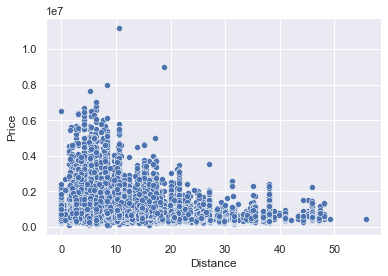

In [31]:
sns.scatterplot(data = df, x = "Distance", y = "Price");

Como vemos en el plot, vemos que las casas que están más lejos de la playa son más baratas como nos había "dicho" la correlación de Pearson. 

Bien, también nos podríamos preguntar si existe alguna correlación entre el número de habitaciones y los precios. Podríamos volver a hacer la correlación usando `np.corrcoef`, pero Pandas también tiene un método propio que nos permite medir esta correlación entre múltiples columnas, es el método `.corr()`. 

In [32]:
m_correlacion_pandas = df.corr()
m_correlacion_pandas

,Rooms,Price,Postcode,Propertycount,Distance,diferencia
Rooms,1.000000,0.412444,0.092044,-0.057386,0.278645,0.412444
Price,0.412444,1.000000,0.003112,-0.060769,-0.253671,1.000000
Postcode,0.092044,0.003112,1.000000,-0.000940,0.504439,0.003112
Propertycount,-0.057386,-0.060769,-0.000940,1.000000,0.007626,-0.060769
Distance,0.278645,-0.253671,0.504439,0.007626,1.000000,-0.253671
diferencia,0.412444,1.000000,0.003112,-0.060769,-0.253671,1.000000


Si nos fijamos en el resultado del método `.corr()` vemos que por defecto nos ha sacado la correlación entre todas las variables continuas. Sin embargo, esto puede resultar un poco tedioso de interpretar. Una buena solución y ampliamente usada es plotear esto en un mapa de calor. Veamos como lo podemos hacer:

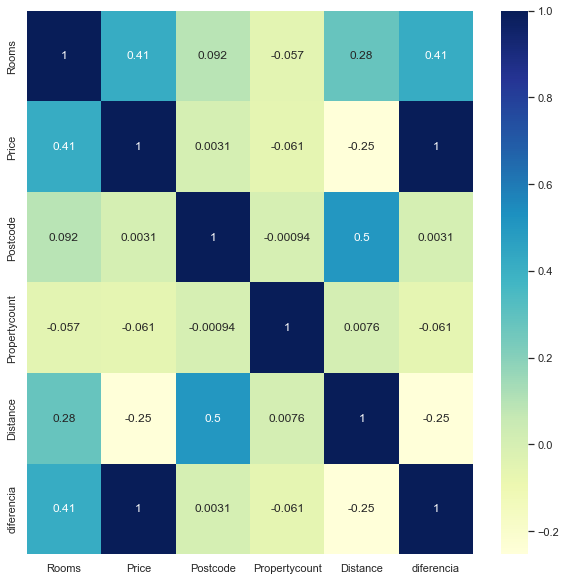

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(m_correlacion_pandas,
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

De esta forma, y de un solo vistazo, podemos ver  más claramente como es la relación entre nuestras variables continuas. Así, nos habíamos preguntado si existía una relación entre el número de habitaciones y el precio. Si nos vamos al heatmap vemos que tiene un valor de 0.41. Es decir, a mayor número de habitaciones más caras serán las casas, un resultado que nos podríamos esperar. 

Como dijimos antes, podemos verlo también en un *scatterplot*, en este caso haremos lo mismo, pero uniremos el *scatterplot* que creamos antes con este nuevo. 

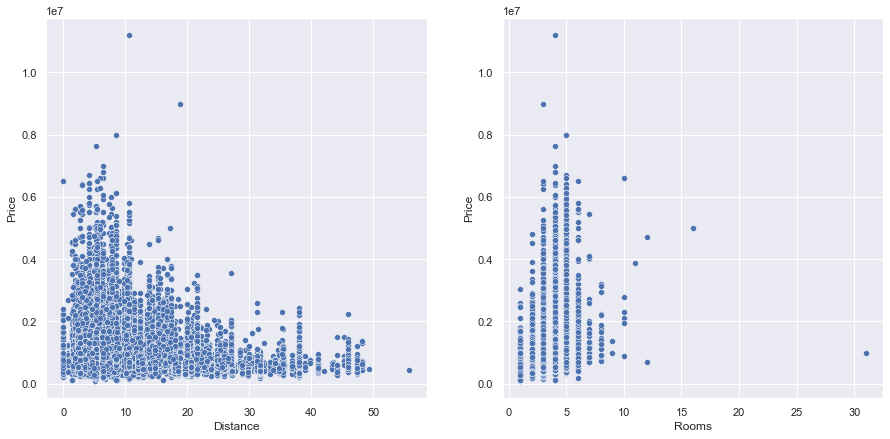

In [34]:
# iniciamos los subplots y el tamaño de la figura
fig,ax = plt.subplots(1,2, figsize = (15, 7))

# creamos los distintos scatterplot
sns.scatterplot(data = df, x = "Distance", y = "Price", ax = ax[0])
sns.scatterplot(data = df, x = "Rooms", y = "Price", ax = ax[1]);

Si bien en este gráfico hemos visto como se relaciona solo dos variables con la variable precio, pero podríamos querer saber como se relacionan todas las variables de nuestro dataset dos a dos, es decir, usaremos un ***pairplot***

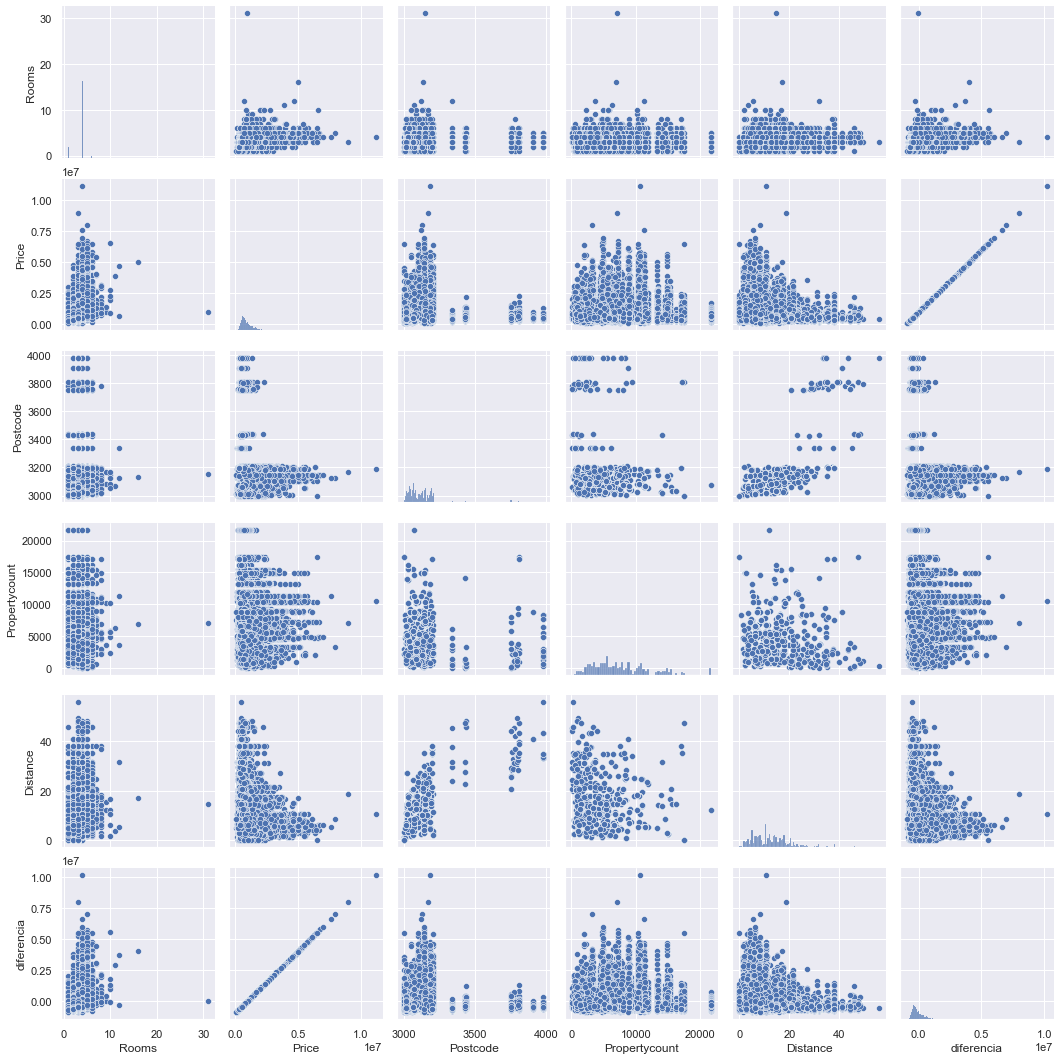

In [55]:
sns.pairplot(df);

Bien, ya hemos visto como están relacionadas las variables continuas. Como dijimos al inicio de este apartado, si quieramos saber como se relacionan las variables categóricas deberíamos usar las tablas de contingencia.

Antes de las preguntas hagamos una aclaración. En nuestro dataset tenemos la columna "Type" la cual nos da información de que tipo de casa es. Os dejamos por aquí la leyenda para entender esa columna: 

- `h`: casa, casa de campo, chalet, semi, terraza
- `u`: piso, duplex
- `t`: adosado

- Si bien es cierto que estamos interesadas en comprarnos una casa, lo cierto es que tenemos especial interés en los duplex. Es por esto, que queremos saber en que región hay más pisos de este tipo, para hacernos una idea de donde deberemos buscar para tener más exito. Cómo se trata de dos variables de tipo categórico, en este caso deberemos hacer una tabla de contingencia. 

Este tipo de aproximación nos va a dar información sobre el conteo de las frecuencias ( es decir, las veces que aparecen). 

In [35]:
# creamos nuestra crosstab para las dos columnas en las que estamos interesadas
data_crosstab = pd.crosstab(df['Regionname'], df['Type'])

In [36]:
data_crosstab

Type,h,t,u
Regionname,,,
Eastern Metropolitan,5971,651,963
Eastern Victoria,363,4,7
Northern Metropolitan,9638,1438,2521
Northern Victoria,444,2,9
South-Eastern Metropolitan,3023,416,571
Southern Metropolitan,6937,1607,4005
Western Metropolitan,7610,862,1208
Western Victoria,174,0,8


De nuevo, esto lo podemos visualizar, para eso podemos hacer un gráfico de barras que nos va a representar el conteo de cada una de las posiciones, por lo tanto, podemos hacer un `countplot`.

Si vemos con detenimiento la gráfica veremos que esta gráfica nos devuelve lo mismo que la *cross tab* pero visualmente. 

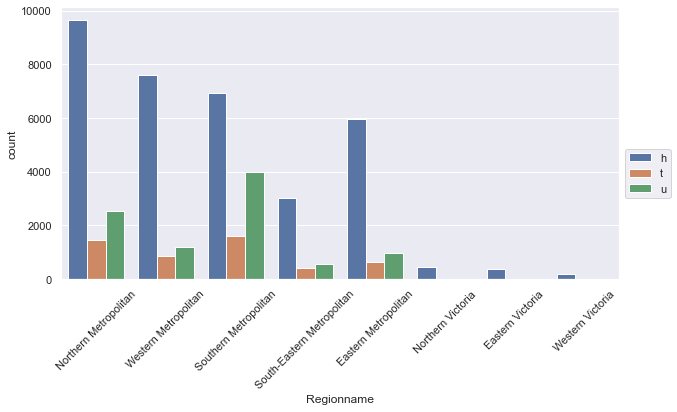

In [50]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data = df, x = "Regionname", hue = "Type") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.

Viendo los resultados, vemos que el mayor número de casas de tipo duplex estan en la región `Southern Metropolitan` (4005, es decir, en esta región hay 4005 pisos de tipo h) y `Northern Metropolitan` (2521, es decir, en esta región hay 2521 de tipo h), por lo que si queremos buscar pisos de ese tipo, lo recomendable es que empecemos a buscar por esas zonas.  